In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

In [26]:
# Take a look at Jim's flare stats
df = pd.read_csv('sector007_flare_out.csv')
print(str(len(df)) + ' flare detections')

1991 flare detections


Text(0, 0.5, 'Peak/Median Flux')

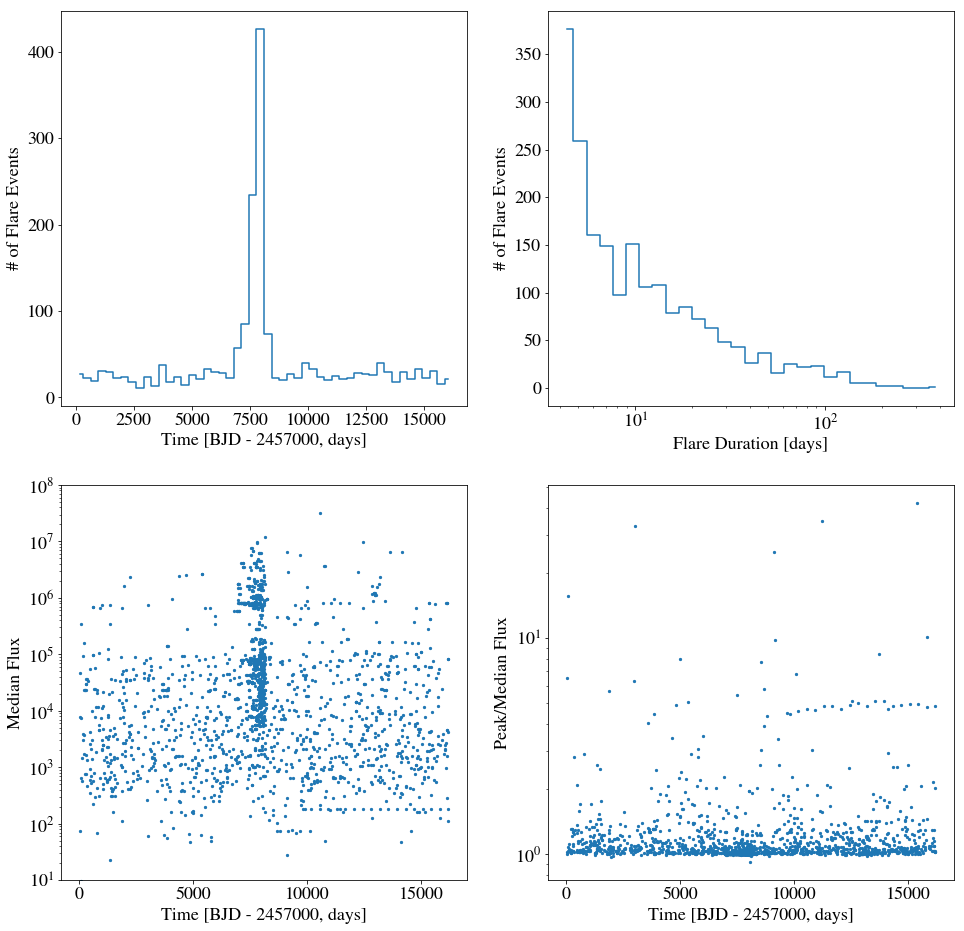

In [27]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['i0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['i1'] - df['i0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['i0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['i0'], df['peak']/df['med'], s=5)
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [31]:
mask = (df['i0'] < 6000) | (df['i0'] > 9000)
print(len(df[mask]))

1015


In [17]:
peakDivMed = df['peak']/df['med']
numBelowMed = len(peakDivMed[peakDivMed < 1])
print('There are ' + str(numBelowMed) + ' flare detections in which the peak flux is smaller than the median.')

There are 45 flare detections in which the peak flux is smaller than the median.


<h3>Features to investigate:</h3>

There are a number of stars between T=10,000 and 15,000 with the same median flux. Is something going wrong with our model here?<br>

There are ~50 flare events in which the peak flux is less than the median. What's going on here?

In [19]:
# Take a look at my flare stats
df = pd.read_csv('7_flare_out.csv')
print(str(len(df)) + ' flare detections')

1081 flare detections


Text(0, 0.5, 'Peak/Median Flux')

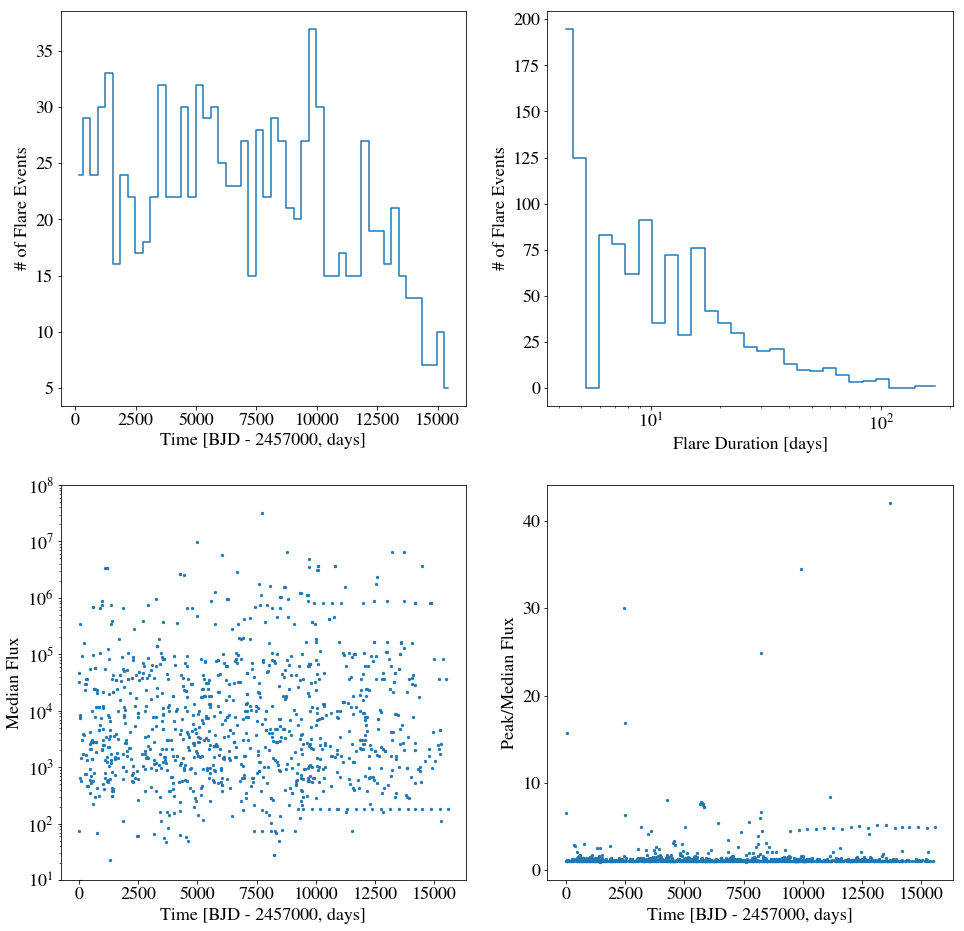

In [20]:
fig, axes = plt.subplots(figsize=(16,16), nrows=2, ncols=2)

hist, bins = np.histogram(df['i0'], bins=50)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][0].plot(bins, hist, linestyle='steps-mid')
axes[0][0].set_xlabel('Time [BJD - 2457000, days]')
axes[0][0].set_ylabel('# of Flare Events')

duration = df['i1'] - df['i0']
bins = np.logspace(np.log10(np.min(duration)), np.log10(np.max(duration)), num=30)
hist, bins = np.histogram(duration, bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
axes[0][1].semilogx(bins, hist, linestyle='steps-mid')
axes[0][1].set_xlabel('Flare Duration [days]')
axes[0][1].set_ylabel('# of Flare Events')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][0].scatter(df['i0'], df['med'], s=5)
axes[1][0].set_yscale('log')
axes[1][0].set_ylim(10, 1e8)
axes[1][0].set_xlabel('Time [BJD - 2457000, days]')
axes[1][0].set_ylabel('Median Flux')

bins = 0.5*(bins[1:] + bins[:-1])
axes[1][1].scatter(df['i0'], df['peak']/df['med'], s=5)
#axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Time [BJD - 2457000, days]')
axes[1][1].set_ylabel('Peak/Median Flux')

In [21]:
peakDivMed = df['peak']/df['med']
numBelowMed = len(peakDivMed[peakDivMed < 1])
print('There are ' + str(numBelowMed) + ' flare detections in which the peak flux is smaller than the median.')

There are 38 flare detections in which the peak flux is smaller than the median.
